# 선형 회귀
- y = wx의 형태를 갖는 간단한 선형 회귀를 실습해보자.

In [2]:
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터 생성하기
- numpy를 활용하여 간단하게 선형 회귀 데이터를 생성
- x값에 따른 y값은 해당 x값에 랜덤 노이즈를 더하여, 회귀 계산에 적합한 분포의 데이터로 생성

In [3]:
X = np.linspace(0, 10, 10)
Y = X + np.random.randn(*X.shape)

# 데이터 조회
- 아래의 코드를 통해 임의로 생성된 데이터를 조회할 수 있다.
- 하나의 함수로 얻을 수 없는, x에 해당하는 y값을 볼 수 있다.
- 선형 회귀를 통해, 아래 데이터 분포에 가장 적합한 (약간의 에러를 허용하는) w를 찾아보자.

In [5]:
for x, y in zip(X, Y):
    print((round(x, 1), round(y, 1)))

(0.0, -1.8)
(1.1, -0.4)
(2.2, 2.6)
(3.3, 4.6)
(4.4, 3.8)
(5.6, 5.1)
(6.7, 6.9)
(7.8, 7.1)
(8.9, 7.0)
(10.0, 12.8)


# 선형 회귀 모델 만들기
- Keras의 Sequential을 사용하면, 단 몇줄로 선형 회귀 모델을 만들 수 있다.

In [6]:
model = Sequential()
model.add(Dense(input_dim=1, units=1, activation='linear', use_bias=False))

- 경사하강법 (gradient descent)로 선형회귀 함수를 구합니다.
- learning rate은 0.01로 지정하였으며, 비용 함수는 평균 제곱 오차 (mse: Mean Squared Error)를 사용

In [7]:
sgd = optimizers.SGD(lr=0.05)
model.compile(optimizer='sgd', loss='mse')

C:\Users\user\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


- 선형 회귀 모델을 학습하기 전에, 먼저 최초로 설정된 w(기울기)를 조회해보자

In [8]:
weights = model.layers[0].get_weights()
w = weights[0][0][0]

print('initial w is : ' + str(w))

initial w is : 1.4914643


# 선형 회귀 모델 학습
- 아래의 코드를 실행하여 학습하자
- 총 10개의 데이터가 있으므로, batch_size를 10으로 설정하여 batch gradient descent를 실행
- epochs=10은 총 10번 반복 수행하여 모델을 학습한다는 뜻

In [9]:
model.fit(X, Y, batch_size=10, epochs=10, verbose=1)

Epoch 1/10
1/1 [==============================] - 0s 438ms/step - loss: 9.9886
Epoch 2/10
1/1 [==============================] - 0s 8ms/step - loss: 2.6933
Epoch 3/10
1/1 [==============================] - 0s 8ms/step - loss: 2.0528
Epoch 4/10
1/1 [==============================] - 0s 8ms/step - loss: 1.9966
Epoch 5/10
1/1 [==============================] - 0s 7ms/step - loss: 1.9916
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 1.9912
Epoch 7/10
1/1 [==============================] - 0s 11ms/step - loss: 1.9912
Epoch 8/10
1/1 [==============================] - 0s 8ms/step - loss: 1.9912
Epoch 9/10
1/1 [==============================] - 0s 8ms/step - loss: 1.9912
Epoch 10/10
1/1 [==============================] - 0s 6ms/step - loss: 1.9912


- 학습된 선형 회귀 모델의, w(기울기)를 조회해보자

In [10]:
weights = model.layers[0].get_weights()
w = weights[0][0][0]

print('trained w is : ' + str(w))

trained w is : 1.0147127


# 선형회귀 시각화
- 아래의 코드를 선형 회귀 모델을 시각화할 수 있다
- x값에 해당하는 선형 모델의 예측값이 우리가 랜덤으로 생성한 데이터 y와 상당히 비슷하다.
- 이처럼 관찰된 데이터를 통해 얻어진 데이터 분포의 패턴을 파악하는 것을 선형 회귀라 하며,
- 이를 통해 관찰되지 않은 데이터에 대한 예측을 하는 것이 선형 회귀의 목적이라고 할 수 있다.

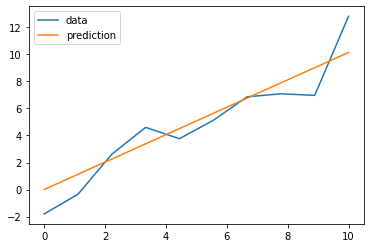

In [11]:
plt.plot(X, Y, label = 'data')
plt.plot(X, w * X, label = 'prediction')
plt.legend()
plt.show()